# Gradient Descent Algorithm in Machine Learning


Gradient Descent is an optimisation algorithm which is capable of providing optimal performance to a wide range of tasks in Machine Learning. The idea behind a Gradient Descent algorithm is to tweak the parameters using loops to minimize the cost function.

One of the most important parameters of the Gradient Descent algorithm is the size of its steps which is determined by a Hyperparameter known as the learning rate. If the learning rate is very small then our algorithm will need to cover a lot of loops which may take a long time, and if the learning rate is very high then our algorithm may fail to find the best solution.


When you use a Gradient Descent algorithm, you should make sure that all the features we use should have a similar scale, otherwise, it will take very long to converge. One thing you should know that this algorithm is evolved from a linear model. So before diving into how we can use this algorithm, I will first create a linear model which is necessary for our task.

# Preparing a Linear Model for Gradient Descent


In [4]:
# Python ≥3.5 is required
import sys
assert sys.version_info 

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
linear = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(linear)
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

Implementing a Gradient Descent Algorithm

To implement a Gradient Descent algorithm you first need to calculate the Gradient cost concerning the parameters of each model. Now let’s go through the implementation of this algorithm:

In [5]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients


The above algorithm doesn’t look much hard now let’s have a quick look at the resulting theta:

In [6]:
theta


array([[4.21509616],
       [2.77011339]])

So this is exactly what a gradient descent algorithm does, we just found some perfect results. But what if we will use a different learning rate known as eta. Let’s use a different learning rate and also see how we can plot this algorithm using Matplotlib:

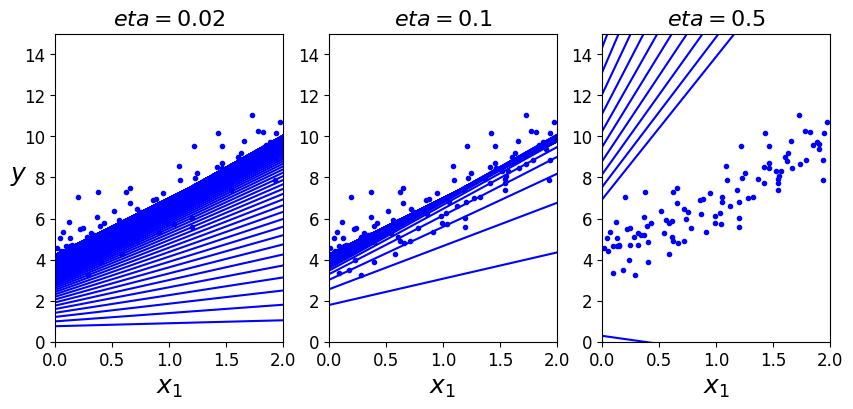

In [19]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration:
            y_predict = X_new_b.dot(theta)
            style = "b-" 
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$eta = {}$".format(eta), fontsize=16)
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.savefig("gradient_descent_plot")
plt.show()

Gradient Descent Algorithm

The plot above shows our algorithm with various learning rates:

1.One the left, the learning rate is very low. It shows that the algorithm will reach the solution but it will take a long time because of the low learning rate.

2.In the middle, the learning rate looks very good. It shows that the algorithm will reach the solutions using a few numbers of iterations.

3.The right one shows that the learning rate is very high. Here the algorithm dives all over the place which shows that our algorithm is getting away from the solution with every step.

Now you may think how to set the number of iterations. If the iterations are very less you will be far from reaching the solution and if the iterations are top high then you will just waste your time because the model parameters will never change with that.

A simple solution is to set a very large number of iterations and to interrupt your gradient descent algorithm when the Gradient vectors become small.